# Lab 3

## Prem Shah

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Before - After
    

In [5]:
yrbs = pd.read_table('data/yrbs.tsv.bz2')
print(yrbs.head())
print(yrbs.shape)
print(yrbs.year.unique())
print(yrbs.age.unique())
print(yrbs.sex.unique())
print(yrbs.meth.unique())
print(yrbs.tv.unique())
print(yrbs.state.unique())


   year  age sex  meth  tv state
0  2003   13   M     0   1    XX
1  2003   13   M     1   1    XX
2  2003   13   M     1   1    XX
3  2003   13   M     0   1    XX
4  2003   13   M     0   0    XX
(58077, 6)
[2003 2005 2007 2009]
[13 14 15 16 17]
['M' 'F']
[0 1]
[1 0]
['XX' 'MT']


In [50]:
print(pd.isnull(yrbs).any() )

year      False
age       False
sex       False
meth      False
tv        False
state     False
before    False
dtype: bool


From the above result, we can say that there is no missing data

In [18]:
conditions = [
    (yrbs['year'] == 2003) | (yrbs['year'] == 2005),
    (yrbs['year'] == 2007) | (yrbs['year'] == 2009)]
choices = [0,1]
yrbs['before'] = np.select(conditions, choices, default=0)
yrbs.head()

,year,age,sex,meth,tv,state,before
0,2003,13,M,0,1,XX,0
1,2003,13,M,1,1,XX,0
2,2003,13,M,1,1,XX,0
3,2003,13,M,0,1,XX,0
4,2003,13,M,0,0,XX,0


Here, we compute an additional variable before which is 0 if the year is 2003/2005 and 1 if the year is 2007/2009.

## 1.2 Graphical Exploration

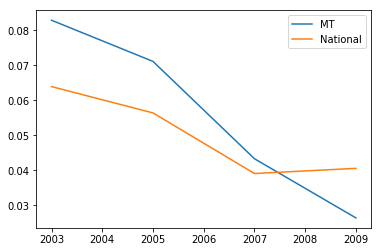

In [7]:
ym = yrbs.groupby(['year', 'state']).meth.mean().reset_index()
plt.plot(ym.year[ym.state=='MT'], ym.meth[ym.state=='MT'], label='MT')
plt.plot(ym.year[ym.state=='XX'], ym.meth[ym.state=='XX'], label='National')
plt.legend()
plt.show()

### 1.3 Before-After

#### Simple Table

In [20]:
yrbs[yrbs.state == 'MT'].groupby('before').meth.mean()

before
0    0.076734
1    0.038115
Name: meth, dtype: float64

Here, we can see that the meth usage has gone down after the campaign.

In [23]:
yrbs[yrbs.state == 'XX'].groupby('before').meth.mean()

before
0    0.060319
1    0.039923
Name: meth, dtype: float64

We can also see that the meth usage has gone down for the rest as well.

In [51]:
m = smf.ols(formula = 'meth ~ before', data = yrbs[yrbs.state == 'MT'])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.19e-16
Time:                        20:43:19   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0767      0.003     23.106      0.000       0.070       0.083
before        -0.0386      0.005     -8.225      0.000      -0.048      -0.029
==============================================================================
Omnibus:                     7326.455   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84570.020
Skew:                           3.765   Prob(JB):                         0.00
Kurtosis:                      15.304   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we do not account for any other controls and see that the coefficient is slightly negative for the variable 'before'

In [27]:
m = smf.ols(formula = 'meth ~ before*tv*age*sex', data = yrbs[yrbs.state == 'MT'])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.459
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.08e-14
Time:                        19:04:46   Log-Likelihood:                 432.32
No. Observations:                9754   AIC:                            -832.6
Df Residuals:                    9738   BIC:                            -717.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0797      0.102     -0.781      0.435      -0.280       0.120
sex[T.M]                   0.0461      0.155      0.298      0.766      -0.257       0.349
before                    -0.1337      0.139     -0.959      0.338      -0.407       0.140
before:sex[T.M]            0.0140      0.211      0.067      0.947      -0.399       0.427
tv                        -0.1016      0.147     -0.691      0.489      -0.390       0.186
tv:sex[T.M]                0.0451      0.216      0.209      0.835      -0.378       0.469
before:tv                  0.1147      0.206      0.556      0.579      -0.290       0.519
before:tv:sex[T.M]         0.0524      0.302      0.173      0.862      -0.540       0.645
age                        0.0099      0.006      1.533      0.125      -0.003       0.023
age:sex[T.M]              -0.0033      0.010     -0.334      0.738      -0.023       0.016
before:age                 0.0059      0.009      0.667      0.505      -0.011       0.023
before:age:sex[T.M]       -0.0003      0.013     -0.021      0.983      -0.026       0.026
tv:age                     0.0070      0.009      0.744      0.457      -0.011       0.025
tv:age:sex[T.M]           -0.0031      0.014     -0.226      0.822      -0.030       0.024
before:tv:age             -0.0075      0.013     -0.571      0.568      -0.033       0.018
before:tv:age:sex[T.M]    -0.0036      0.019     -0.186      0.852      -0.041       0.034
==============================================================================
Omnibus:                     7298.185   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83575.689
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      15.225   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After considering all controls, we see that the coefficients is a little lower.

### 1.3 Cross Sectional Estimator

In [28]:
yrbs[yrbs.before == 1].groupby('state').meth.mean()

state
MT    0.038115
XX    0.039923
Name: meth, dtype: float64

Here, we can see that the Meth consumption in Montana is slightly lower than the rest.

In [29]:
m = smf.ols(formula = 'meth ~ state', data = yrbs[yrbs.before == 1])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.554
Time:                        19:13:56   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      0.003     13.648      0.000       0.033       0.044
state[T.XX]     0.0018      0.003      0.592      0.554      -0.004       0.008
==============================================================================
Omnibus:                    27196.729   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           619647.247
Skew:                           4.720   Prob(JB):                         0.00
Kurtosis:                      23.277   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For states except Montana, the coefficient is slightly positive than Montana suggesting that it is better.

In [30]:
m = smf.ols(formula = 'meth ~ state*age*sex*tv', data = yrbs[yrbs.before == 1])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.184
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           8.61e-08
Time:                        19:14:43   Log-Likelihood:                 6435.2
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29712   BIC:                        -1.271e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2134      0.080     -2.670      0.008      -0.370      -0.057
state[T.XX]                     0.1653      0.090      1.838      0.066      -0.011       0.342
sex[T.M]                        0.0601      0.121      0.498      0.618      -0.176       0.296
state[T.XX]:sex[T.M]           -0.1090      0.136     -0.803      0.422      -0.375       0.157
age                             0.0159      0.005      3.123      0.002       0.006       0.026
state[T.XX]:age                -0.0103      0.006     -1.813      0.070      -0.022       0.001
age:sex[T.M]                   -0.0036      0.008     -0.466      0.641      -0.019       0.011
state[T.XX]:age:sex[T.M]        0.0069      0.009      0.804      0.422      -0.010       0.024
tv                              0.0132      0.122      0.108      0.914      -0.226       0.252
state[T.XX]:tv                  0.0305      0.134      0.228      0.820      -0.231       0.292
sex[T.M]:tv                     0.0975      0.178      0.548      0.584      -0.251       0.446
state[T.XX]:sex[T.M]:tv        -0.0902      0.195     -0.463      0.644      -0.472       0.292
age:tv                         -0.0005      0.008     -0.070      0.944      -0.016       0.015
state[T.XX]:age:tv             -0.0026      0.008     -0.308      0.758      -0.019       0.014
age:sex[T.M]:tv                -0.0067      0.011     -0.591      0.555      -0.029       0.015
state[T.XX]:age:sex[T.M]:tv     0.0068      0.012      0.549      0.583      -0.017       0.031
==============================================================================
Omnibus:                    27133.773   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           614678.081
Skew:                           4.705   Prob(JB):                         0.00
Kurtosis:                      23.191   Cond. No.                     8.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we see the same but with controls.

### 1.3 Diff in Diff Estimator


In [32]:
yrbs.groupby(['state','before']).meth.mean()

state  before
MT     0         0.076734
       1         0.038115
XX     0         0.060319
       1         0.039923
Name: meth, dtype: float64

In [39]:
(0.076734 - 0.060319) - (0.038115 - 0.039923)

0.018222999999999996

In [41]:
m = smf.ols(formula = 'meth ~ before*state', data = yrbs)
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.31e-40
Time:                        19:36:22   Log-Likelihood:                 5566.9
No. Observations:               58077   AIC:                        -1.113e+04
Df Residuals:                   58073   BIC:                        -1.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0767      0.003     24.366      0.000       0.071       0.083
state[T.XX]           -0.0164      0.003     -4.743      0.000      -0.023      -0.010
before                -0.0386      0.004     -8.674      0.000      -0.047      -0.030
before:state[T.XX]     0.0182      0.005      3.733      0.000       0.009       0.028
==============================================================================
Omnibus:                    46583.747   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           670089.493
Skew:                           4.057   Prob(JB):                         0.00
Kurtosis:                      17.528   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
m = smf.ols(formula = 'meth ~ before*age*sex*tv*state', data = yrbs)
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.537
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           8.25e-45
Time:                        19:34:03   Log-Likelihood:                 5620.1
No. Observations:               58077   AIC:                        -1.118e+04
Df Residuals:                   58045   BIC:                        -1.089e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0797      0.097     -0.823      0.411      -0.269       0.110
sex[T.M]                               0.0461      0.147      0.314      0.754      -0.242       0.334
state[T.XX]                            0.0527      0.110      0.477      0.633      -0.164       0.269
sex[T.M]:state[T.XX]                  -0.1283      0.167     -0.769      0.442      -0.456       0.199
before                                -0.1337      0.132     -1.011      0.312      -0.393       0.125
before:sex[T.M]                        0.0140      0.200      0.070      0.944      -0.378       0.406
before:state[T.XX]                     0.1126      0.150      0.751      0.452      -0.181       0.406
before:sex[T.M]:state[T.XX]            0.0193      0.226      0.085      0.932      -0.425       0.463
age                                    0.0099      0.006      1.617      0.106      -0.002       0.022
age:sex[T.M]                          -0.0033      0.009     -0.352      0.725      -0.022       0.015
age:state[T.XX]                       -0.0043      0.007     -0.611      0.541      -0.018       0.009
age:sex[T.M]:state[T.XX]               0.0090      0.011      0.849      0.396      -0.012       0.030
before:age                             0.0059      0.008      0.703      0.482      -0.011       0.022
before:age:sex[T.M]                   -0.0003      0.013     -0.022      0.982      -0.025       0.025
before:age:state[T.XX]                -0.0061      0.010     -0.638      0.524      -0.025       0.013
before:age:sex[T.M]:state[T.XX]       -0.0021      0.014     -0.145      0.885      -0.030       0.026
tv                                    -0.1016      0.139     -0.729      0.466      -0.375       0.172
sex[T.M]:tv                            0.0451      0.205      0.220      0.826      -0.357       0.447
tv:state[T.XX]                         0.0959      0.154      0.622      0.534      -0.206       0.398
sex[T.M]:tv:state[T.XX]                0.0181      0.227      0.080      0.936      -0.427       0.463
before:tv                              0.1147      0.196      0.586      0.558      -0.269       0.499
before:sex[T.M]:tv                     0.0524      0.287      0.183      0.855      -0.510       0.614
before:tv:state[T.XX]                 -0.0655      0.215     -0.304      0.761      -0.488       0.357
before:sex[T.M]:tv:state[T.XX]        -0.1083      0.316     -0.343      0.732      -0.728       0.511
age:tv                                 0.0070      0.009      0.785      0.433      -0.010       0.024
age:sex[T.M]:tv                       -0.0031      0.013     -0.238      0.812      -0.029       0.022
age:tv:state[T.XX]                    -0.0072      0.010     -0.731      0.465      -0.026      

Here, we consider the whole data and see that for the other states the coefficient is slightly positive. We see that the post project effect is only slight but that might be because we consider 2007 and 2009 both. In 2007, Montana's consumption is higher but in 2009 it is very low. Maybe because of that, the mean is showing an overall result. 